In [1]:
import os
print(os.getcwd())


C:\Users\PraveenKumar\RetinaNet


In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [3]:
%cd keras-retinanet/
!pip install .


C:\Users\PraveenKumar\RetinaNet\keras-retinanet
Processing c:\users\praveenkumar\retinanet\keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp37-cp37m-win_amd64.whl size=131824 sha256=a68fa8e4394e06ac560035ce91e250ae085727b7ddb5c0d3e38d45dc4465255f
  Stored in directory: c:\users\praveenkumar\appdata\local\pip\cache\wheels\e5\47\b4\8991cdf5e42d9c0f79ee7f2b5d207614947bbe97a09a936dc0
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


In [17]:
!python setup.py build_ext --inplace


running build_ext
skipping 'keras_retinanet/utils\compute_overlap.c' Cython extension (up-to-date)
copying build\lib.win-amd64-3.7\keras_retinanet\utils\compute_overlap.cp37-win_amd64.pyd -> keras_retinanet\utils


In [27]:
import numpy as np
import shutil

import os, sys, random
import xml.etree.ElementTree as ET
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import requests
import urllib
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.image import preprocess_image, resize_image


In [2]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet'

In [3]:
%cd keras-retinanet

C:\Users\PraveenKumar\RetinaNet\keras-retinanet


In [31]:
pngPath='C:/Users/PraveenKumar/RetinaNet//Img_data/'
annotPath='C:/Users/PraveenKumar/RetinaNet//annotations/'

data=pd.DataFrame(columns=['fileName','xmin','ymin','xmax','ymax','class'])


os.getcwd()

#read All files
allfiles = [f for f in listdir(annotPath) if isfile(join(annotPath, f))] 

In [32]:
allfiles[0:1]

['Invoice_0.xml']

In [33]:
#Read all pdf files in images and then in text and store that in temp folder
for file in allfiles:
    #print(file)
    if (file.split(".")[1]=='xml'):
        fileName='C:/Users/PraveenKumar/RetinaNet/Img_data/'+file.replace(".xml",'.png')
        tree = ET.parse(annotPath+file)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            #print(file)
            xml_box = obj.find('bndbox')
            xmin = xml_box.find('xmin').text
            ymin = xml_box.find('ymin').text
            xmax = xml_box.find('xmax').text
            ymax = xml_box.find('ymax').text
            # Append rows in Empty Dataframe by adding dictionaries
            data = data.append({'fileName': fileName, 'xmin': xmin, 'ymin':ymin,'xmax':xmax,'ymax':ymax,'class':cls_name}, ignore_index=True)

                
data.shape  
data.to_csv('../data.csv',header=None,index=False)

In [35]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

['74', '354', '419', '417']
['692', '372', '1314', '422']
['67', '439', '379', '507']
['704', '442', '1654', '502']
['74', '354', '419', '417']
['692', '372', '1314', '422']
['67', '439', '379', '507']
['704', '442', '1654', '502']
['74', '354', '419', '417']
['692', '372', '1314', '422']
['67', '439', '379', '507']
['704', '442', '1654', '502']
['74', '354', '419', '417']
['692', '372', '1314', '422']
['67', '439', '379', '507']
['704', '442', '1654', '502']


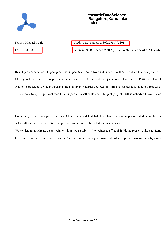

In [36]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = df.sample()['fileName'].values[0]

  # get all rows for this image
  df2 = df[df['fileName'] == filepath]
  im = np.array(Image.open(filepath))

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  for idx, row in df2.iterrows():
    box = [
      row['xmin'],
      row['ymin'],
      row['xmax'],
      row['ymax'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))

  plt.axis('off')
  plt.imshow(im)
  plt.show()                  
                  
                  
show_image_with_boxes(data)                  
      


In [37]:
# data['xmin']=data['xmin'].astype(int)
# data['ymin']=data['ymin'].astype(int)
# data['xmax']=data['xmax'].astype(int)
# data['ymax']=data['ymax'].astype(int)

In [40]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

In [38]:
data.head()

,fileName,xmin,ymin,xmax,ymax,class
0,C:/Users/PraveenKumar/RetinaNet/Img_data/Invoi...,67,364,454,424,Name
1,C:/Users/PraveenKumar/RetinaNet/Img_data/Invoi...,694,359,1322,427,ccNumber
2,C:/Users/PraveenKumar/RetinaNet/Img_data/Invoi...,72,449,397,497,DOB
3,C:/Users/PraveenKumar/RetinaNet/Img_data/Invoi...,699,439,1569,512,Address
4,C:/Users/PraveenKumar/RetinaNet/Img_data/Invoi...,69,364,444,432,Name


In [39]:

classes = ['Name','ccNumber','DOB','Address']
with open('classes.csv', 'w') as f:
  for i, class_name in enumerate(classes):
    f.write(f'{class_name},{i}\n')
            
if not os.path.exists('snapshots'):
  os.mkdir('snapshots')                  
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

In [13]:
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)          


Downloaded pretrained model to snapshots/_pretrained_model.h5


In [14]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

In [20]:
!keras_retinanet/bin/train.py --freeze-backbone \
    --random-transform \
    --weights {PRETRAINED_MODEL} \
    --batch-size 8 \
    --steps 500 \
    --epochs 15 \
    csv data.csv classes.csv

'keras_retinanet' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)



path: snapshots\resnet50_csv_02.h5


In [6]:
from keras_retinanet import models

model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('classes.csv'):
  row = line.rstrip().split(',')
  label_map[int(row[1])] = row[0]

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [38]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = row['fileName'].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df['fileName'] == filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row['xmin'],
      row['ymin'],
      row['xmax'],
      row['ymax'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()


In [39]:
plt.rcParams['figure.figsize'] = [20, 10]

filepath: C:/Users/PraveenKumar/RetinaNet/Img_data/Invoice_52.png
im.shape: (2339, 1654, 3)
['74', '370', '361', '419']
['706', '359', '1280', '420']
['695', '440', '1351', '525']
['53', '446', '374', '496']


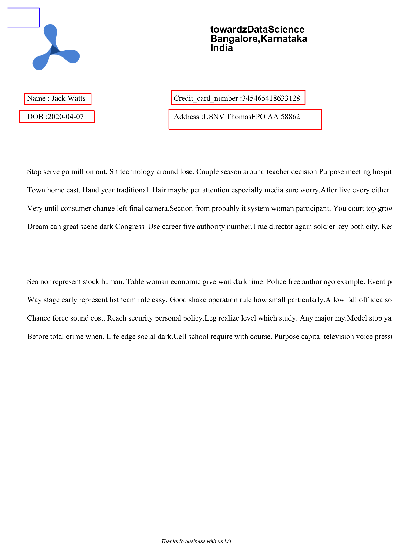

In [43]:
show_image_with_predictions(data, threshold=0)